# Veri Analizi

verimizi okumak ve analizi yapmak için pandas kütüphanesini çalıştırıyoruz.

In [1]:
import pandas as pd
import numpy as np

verimizi read_csv komutu ile okuduktan sonra orjinal veri setinde değişiklik olmasın diye onu kopyaladık ve ilk 5 satırı görüntüledik.

In [2]:
data = pd.read_csv("BNB-USD.csv")
data = data.copy()
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-01,6.191432,6.191929,5.885122,6.075273,6.075273,23891162.0
1,2019-01-02,6.091465,6.207873,5.949006,6.188613,6.188613,30308610.0
2,2019-01-03,6.171907,6.175116,5.901559,5.903535,5.903535,22821639.0
3,2019-01-04,5.895052,6.065898,5.863714,6.065138,6.065138,29311136.0
4,2019-01-05,6.055661,6.204376,6.034071,6.065543,6.065543,30340637.0


veri setimizin bilgilerini özetledik.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       872 non-null    object 
 1   Open       868 non-null    float64
 2   High       868 non-null    float64
 3   Low        868 non-null    float64
 4   Close      868 non-null    float64
 5   Adj Close  868 non-null    float64
 6   Volume     868 non-null    float64
dtypes: float64(6), object(1)
memory usage: 47.8+ KB


'Date' kolonunun datetime veri tipinde gözükmesi gerekirken object olarak kaydedilmiş. Bunu pandas yardımı ile çeviriyoruz.

In [4]:
data["Date"] = pd.to_datetime(data["Date"])

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       872 non-null    datetime64[ns]
 1   Open       868 non-null    float64       
 2   High       868 non-null    float64       
 3   Low        868 non-null    float64       
 4   Close      868 non-null    float64       
 5   Adj Close  868 non-null    float64       
 6   Volume     868 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 47.8 KB


In [6]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-01,6.191432,6.191929,5.885122,6.075273,6.075273,23891162.0
1,2019-01-02,6.091465,6.207873,5.949006,6.188613,6.188613,30308610.0
2,2019-01-03,6.171907,6.175116,5.901559,5.903535,5.903535,22821639.0
3,2019-01-04,5.895052,6.065898,5.863714,6.065138,6.065138,29311136.0
4,2019-01-05,6.055661,6.204376,6.034071,6.065543,6.065543,30340637.0


Eksik verinin olup olmadığına bakıyoruz.

In [7]:
data.isna().sum()

Date         0
Open         4
High         4
Low          4
Close        4
Adj Close    4
Volume       4
dtype: int64

Veri setindeki eksik veriler tüm satır boyunca değer girilmediği için dropna fonksiyonu ile veri setimizden çıkarıyoruz.

In [8]:
data.dropna(axis=0 , inplace=True)

In [9]:
data.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

NaN değerleri hariç olmak üzere bir veri kümesinin dağılımının merkezi eğilimini, dağılımını ve şeklini özetleyen tanımlayıcı istatistiklerini describe fonksiyonu ile kontrol ediyoruz.

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,868.0,6.361431e+01,1.283379e+02,5.577669e+00,1.627285e+01,2.190170e+01,3.077096e+01,6.763159e+02
High,868.0,6.703071e+01,1.358561e+02,6.000758e+00,1.656482e+01,2.245618e+01,3.158919e+01,6.909319e+02
Low,868.0,6.037201e+01,1.207880e+02,5.493421e+00,1.589407e+01,2.112461e+01,2.984952e+01,6.314653e+02
Close,868.0,6.403634e+01,1.287640e+02,5.568757e+00,1.630326e+01,2.193238e+01,3.084270e+01,6.756841e+02
Adj Close,868.0,6.403634e+01,1.287640e+02,5.568757e+00,1.630326e+01,2.193238e+01,3.084270e+01,6.756841e+02
Volume,868.0,8.511292e+08,1.735915e+09,2.282164e+07,2.002332e+08,2.957708e+08,4.633734e+08,1.798295e+10


### Görselleştirme

In [11]:
#!pip install mplfinance

Görselleştirmede kulllanacağımız kütüphaneleri import ediyoruz.

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from datetime import datetime
%matplotlib inline
import mplfinance as mpf

from warnings import filterwarnings
filterwarnings('ignore')

Çoklu değişkenler arasındaki korelasyon katsayılarını ısı haritası ile gösteriyoruz.Bu tabloda bir değişkenin diğer her değişken ile arasındaki korelasyon görülebilir.

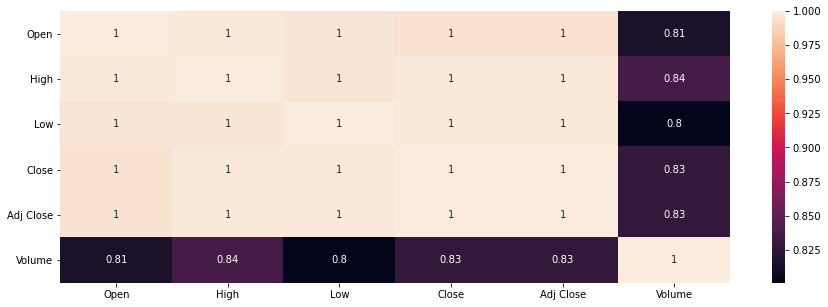

In [13]:
corr = data.corr()
plt.figure(figsize=(15,5))
sns.heatmap(corr,annot=True)

In [14]:
data = data.set_index('Date')

In [15]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,6.191432,6.191929,5.885122,6.075273,6.075273,23891162.0
2019-01-02,6.091465,6.207873,5.949006,6.188613,6.188613,30308610.0
2019-01-03,6.171907,6.175116,5.901559,5.903535,5.903535,22821639.0
2019-01-04,5.895052,6.065898,5.863714,6.065138,6.065138,29311136.0
2019-01-05,6.055661,6.204376,6.034071,6.065543,6.065543,30340637.0


Veri setinin değerleri baz alınarak 2019-2021 tarihleri arasındaki BNB'nin tablounu görüyoruz.

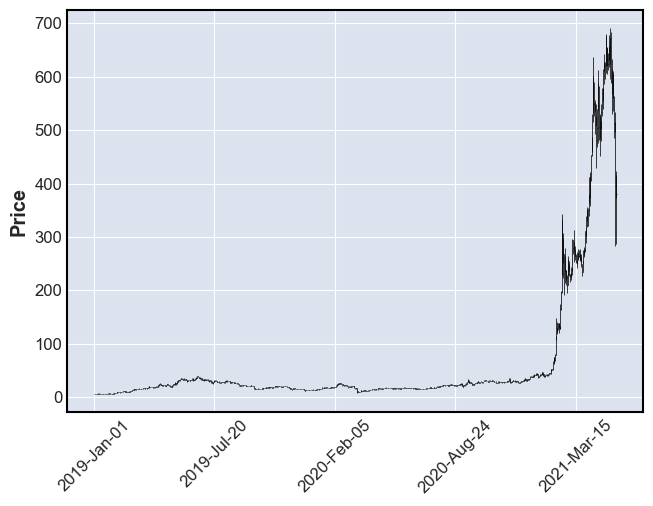

In [16]:
mpf.plot(data)

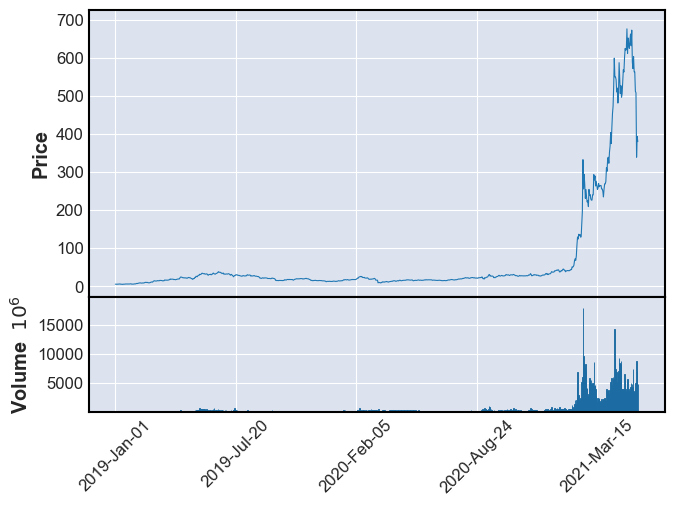

In [17]:
mpf.plot(data , type='line' , volume=True)

2020 yılının Mart ayına ait verileri(isteğe bağlı olarak değiştirebiliyoruz.)

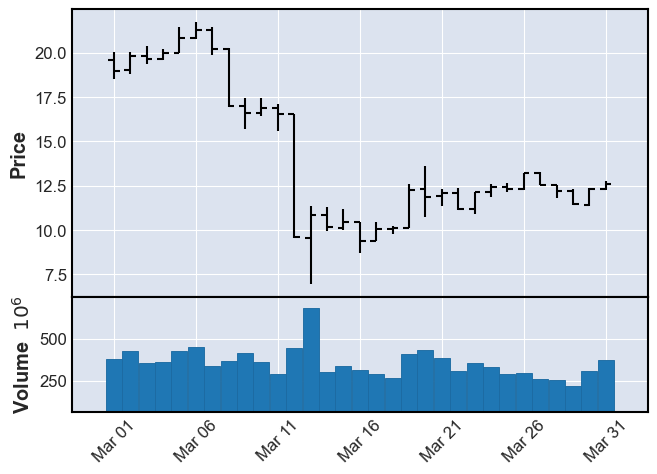

In [18]:
mpf.plot(data["2020-03"] , volume=True)

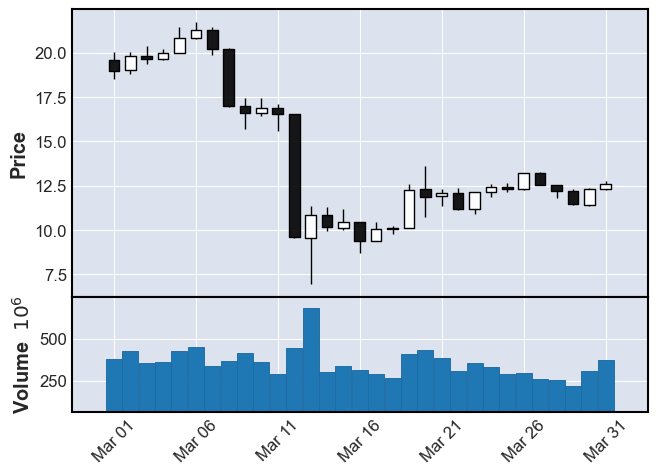

In [19]:
mpf.plot(data["2020-03"] , type = "candle" , volume=True)

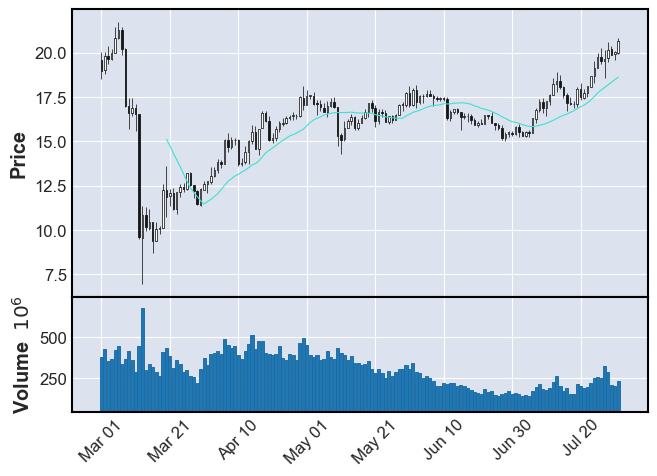

In [20]:
mpf.plot(data["2020-03":"2020-07"] , type = "candle" ,mav=(20), volume=True)

### Modelleme

In [21]:
from sklearn.linear_model import LinearRegression , Ridge , Lasso 
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

In [22]:
from sklearn.model_selection import train_test_split , cross_val_score , GridSearchCV
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.preprocessing import StandardScaler

Veri setimizi eğitim ve test olarak ayırdık. Sayısal girdilerimiz(X) ve çıktılarımız(y). train_test_split methodu ile test verilerimizi oluşturduk. 

In [23]:
y = data["Volume"]
X = data.iloc[: , 1:-1]
x_train, x_test, y_train, y_test = train_test_split(X , y , test_size=0.33 , random_state=42)

In [24]:
y.head()

Date
2019-01-01    23891162.0
2019-01-02    30308610.0
2019-01-03    22821639.0
2019-01-04    29311136.0
2019-01-05    30340637.0
Name: Volume, dtype: float64

In [25]:
X.head()

,High,Low,Close,Adj Close
Date,,,,
2019-01-01,6.191929,5.885122,6.075273,6.075273
2019-01-02,6.207873,5.949006,6.188613,6.188613
2019-01-03,6.175116,5.901559,5.903535,5.903535
2019-01-04,6.065898,5.863714,6.065138,6.065138
2019-01-05,6.204376,6.034071,6.065543,6.065543


In [26]:
def models(x,y):
    L = LinearRegression()
    R = Ridge()
    La = Lasso()
    RFR = RandomForestRegressor()
    GBR = GradientBoostingRegressor()
    DTR = DecisionTreeRegressor()
    scaler = StandardScaler()
    x_train , x_test , y_train , y_test = train_test_split(X , y , test_size=0.33 , random_state=42)
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)
    mod = [L , R , La , RFR , GBR , DTR]
    mod_names = ["LinearReg" , "Ridge" , "Lasso" , "RFR" , "GBR" , "DTR"]
    r2 = []
    mean_s = []
    
    for m in mod:
        model = m.fit(x_train , y_train)
        y_pred = m.predict(x_test)
        r2.append(r2_score(y_test , y_pred))
        mean_s.append(mean_squared_error(y_test , y_pred))
    sonuc = {"Models":mod_names , "r2_scroe": r2 , "Mean_Squared_Error": mean_s }
    sonuc_df2 = pd.DataFrame(sonuc)
    plt.figure(figsize= (5,6))
    sns.barplot(x= ["L" , "R" , "La" , "RFR" , "GBR" , "DTR"], y= r2)
    plt.title('R2_Scores')
    plt.xlabel('Models')
    plt.ylabel('r2_scores')
    plt.show()
    return sonuc_df2

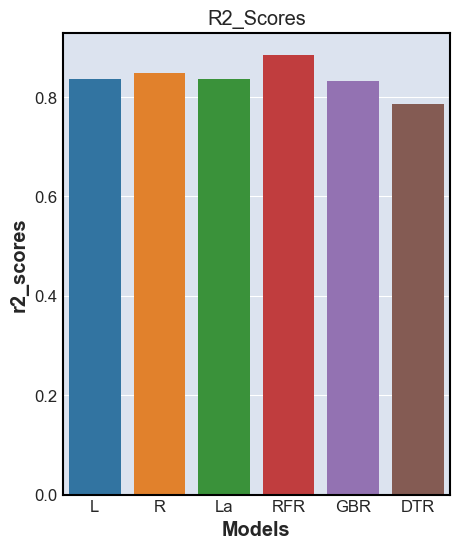

,Models,r2_scroe,Mean_Squared_Error
0,LinearReg,0.836475,3.507246e+17
1,Ridge,0.848426,3.250918e+17
2,Lasso,0.835047,3.537885e+17
3,RFR,0.885083,2.464721e+17
4,GBR,0.830980,3.625098e+17
5,DTR,0.786096,4.587759e+17


In [27]:
sonuc_df2 = models(data.drop("Volume" , axis=1) , data["Volume"])
sonuc_df2

In [28]:
def models(x,y):
    L = LinearRegression()
    R = Ridge(alpha = 0.1 , normalize=True)
    La = Lasso(alpha = 0.1 , normalize=True)
    RFR = RandomForestRegressor(max_depth = 8 , max_features = 3 , n_estimators = 100)
    GBR = GradientBoostingRegressor(learning_rate = 0.2 , max_depth = 5 , n_estimators = 500)
    DTR = DecisionTreeRegressor(max_leaf_nodes = 9, min_samples_split = 76)
    scaler = StandardScaler()
    x_train , x_test , y_train , y_test = train_test_split(X , y , test_size=0.33 , random_state=42)
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)
    mod = [L , R , La , RFR , GBR , DTR]
    mod_names = ["LinearReg" , "Ridge" , "Lasso" , "RFR" , "GBR" , "DTR"]
    r2 = []
    mean_s = []
    
    for m in mod:
        model = m.fit(x_train , y_train)
        y_pred = m.predict(x_test)
        r2.append(r2_score(y_test , y_pred))
        mean_s.append(mean_squared_error(y_test , y_pred))
    sonuc = {"Models":mod_names , "r2_scroe": r2 , "Mean_Squared_Error": mean_s }
    sonuc_df2 = pd.DataFrame(sonuc)
    plt.figure(figsize= (5,6))
    sns.barplot(x= ["L" , "R" , "La" , "RFR" , "GBR" , "DTR"], y= r2)
    plt.title('R2_Scores')
    plt.xlabel('Models')
    plt.ylabel('r2_scores')
    plt.show()
    return sonuc_df2

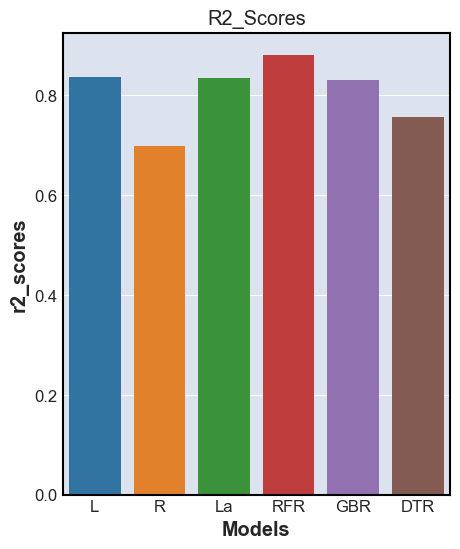

,Models,r2_scroe,Mean_Squared_Error
0,LinearReg,0.836475,3.507246e+17
1,Ridge,0.699108,6.453475e+17
2,Lasso,0.835047,3.537884e+17
3,RFR,0.881638,2.538603e+17
4,GBR,0.830070,3.644613e+17
5,DTR,0.756164,5.229730e+17


In [29]:
sonuc_df2 = models(data.drop("Volume" , axis=1) , data["Volume"])
sonuc_df2

In [30]:
def models(x,y):
    L = LinearRegression()
    R = Ridge(alpha = 0.5 )
    La = Lasso(alpha = 0.7 )
    RFR = RandomForestRegressor(max_depth = 9 , max_features = 4 , n_estimators = 100)
    GBR = GradientBoostingRegressor(learning_rate = 0.5 , max_depth = 8 , n_estimators = 600 )
    DTR = DecisionTreeRegressor(max_leaf_nodes = 15, min_samples_split = 90)
    scaler = StandardScaler()
    x_train , x_test , y_train , y_test = train_test_split(X , y , test_size=0.33 , random_state=42)
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)
    mod = [L , R , La , RFR , GBR , DTR]
    mod_names = ["LinearReg" , "Ridge" , "Lasso" , "RFR" , "GBR" , "DTR"]
    r2 = []
    mean_s = []
    
    for m in mod:
        model = m.fit(x_train , y_train)
        y_pred = m.predict(x_test)
        r2.append(r2_score(y_test , y_pred))
        mean_s.append(mean_squared_error(y_test , y_pred))
    sonuc = {"Models":mod_names , "r2_scroe": r2 , "Mean_Squared_Error": mean_s }
    sonuc_df2 = pd.DataFrame(sonuc)
    plt.figure(figsize= (5,6))
    sns.barplot(x= ["L" , "R" , "La" , "RFR" , "GBR" , "DTR"], y= r2)
    plt.title('R2_Scores')
    plt.xlabel('Models')
    plt.ylabel('r2_scores')
    plt.show()
    return sonuc_df2

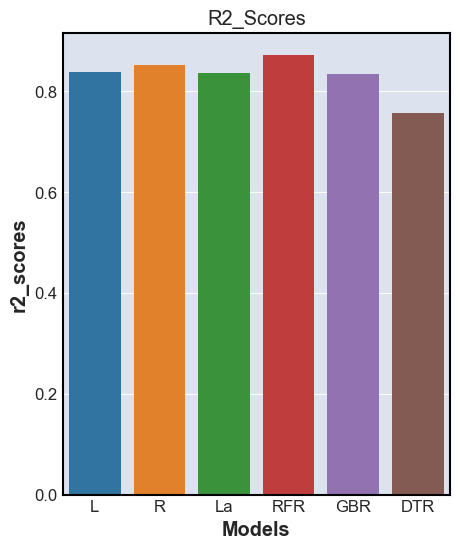

,Models,r2_scroe,Mean_Squared_Error
0,LinearReg,0.836475,3.507246e+17
1,Ridge,0.851300,3.189286e+17
2,Lasso,0.835047,3.537885e+17
3,RFR,0.871864,2.748237e+17
4,GBR,0.834080,3.558607e+17
5,DTR,0.756315,5.226512e+17


In [31]:
sonuc_df2 = models(data.drop("Volume" , axis=1) , data["Volume"])
sonuc_df2

Yaptığımız gözlemler sonucunda her seferinde en iyi sonucu Random Forest Regression'un verdiğini görüyoruz.